In [1]:
import numpy as np
import pandas as pd


In [2]:
df=pd.read_csv("E:\\spam.csv", encoding='latin1')

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df=df.drop(columns=["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"])

In [6]:
df.sample(5)

,v1,v2
1872,ham,Oh ok i didnt know what you meant. Yep i am ba...
1684,ham,Do you want bold 2 or bb torch
3822,ham,Please protect yourself from e-threats. SIB ne...
5395,ham,Dunno lei shd b driving lor cos i go sch 1 hr ...
3220,spam,"Thanks for your ringtone order, reference numb..."


In [7]:
df.rename(columns={"v1": "target", "v2": "text"}, inplace=True)

In [8]:
#Encoder=LabelEncoder()
#Encoder.fit_transform(df["target"])

In [9]:
df['target'] = df['target'].replace({'ham': 0, 'spam': 1})


C:\Users\U$ER\AppData\Local\Temp\ipykernel_13788\647980047.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['target'] = df['target'].replace({'ham': 0, 'spam': 1})


In [10]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.duplicated().sum()

403

In [13]:
df=df.drop_duplicates(keep="first")

In [14]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   target  5169 non-null   int64 
 1   text    5169 non-null   object
dtypes: int64(1), object(1)
memory usage: 121.1+ KB


(5169, 2)

## EDA

In [14]:
df["target"].value_counts()

target
0    4825
1     747
Name: count, dtype: int64

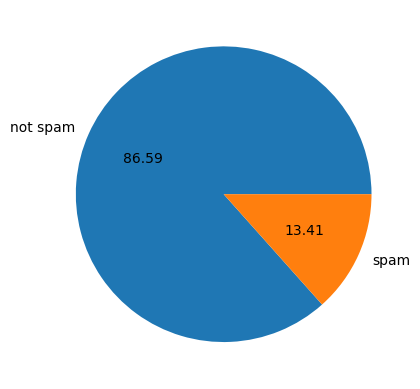

In [18]:
import matplotlib.pyplot as plt
plt.pie(df["target"].value_counts(), labels=["not spam", "spam"], autopct="%0.2f")
plt.show()

Data is imbalanced

In [12]:
nltk.download("punkt")
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\U$ER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\U$ER\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [19]:
#creating new columns
df["num_chars"]=df["text"].apply(len)

In [25]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
df["num_words"]=df["text"].apply(lambda x: len(nltk.word_tokenize(x)))

In [26]:
df["num_sentences"]=df["text"].apply(lambda x: len(nltk.sent_tokenize(x)))

In [27]:
df.head()

,target,text,num_chars,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [21]:
df[["num_chars", "num_sentences", "num_words"]].describe()

,num_chars,num_sentences,num_words
count,5169.000000,5169.000000,5169.000000
mean,78.977945,1.965564,18.455794
std,58.236293,1.448541,13.324758
min,2.000000,1.000000,1.000000
25%,36.000000,1.000000,9.000000
50%,60.000000,1.000000,15.000000
75%,117.000000,2.000000,26.000000
max,910.000000,38.000000,220.000000


In [30]:
df[df["target"]==0]

,target,text,num_chars,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
6,0,Even my brother is not like to speak with me. ...,77,18,2
...,...,...,...,...,...
5565,0,Huh y lei...,12,4,1
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [31]:
df[df["target"]==0].describe()

,target,num_chars,num_words,num_sentences
count,4825.0,4825.000000,4825.000000,4825.000000
mean,0.0,71.023627,17.276269,1.837720
std,0.0,58.016023,13.988585,1.454388
min,0.0,2.000000,1.000000,1.000000
25%,0.0,33.000000,8.000000,1.000000
50%,0.0,52.000000,13.000000,1.000000
75%,0.0,92.000000,22.000000,2.000000
max,0.0,910.000000,220.000000,38.000000


In [32]:
df[df["target"]==0][["num_chars", "num_sentences", "num_words"]].describe()

,num_chars,num_sentences,num_words
count,4825.000000,4825.000000,4825.000000
mean,71.023627,1.837720,17.276269
std,58.016023,1.454388,13.988585
min,2.000000,1.000000,1.000000
25%,33.000000,1.000000,8.000000
50%,52.000000,1.000000,13.000000
75%,92.000000,2.000000,22.000000
max,910.000000,38.000000,220.000000


In [23]:
df[df["target"]==1][["num_chars", "num_sentences", "num_words"]].describe()

,num_chars,num_sentences,num_words
count,653.000000,653.000000,653.000000
mean,137.891271,2.970904,27.667688
std,30.137753,1.488425,7.008418
min,13.000000,1.000000,2.000000
25%,132.000000,2.000000,25.000000
50%,149.000000,3.000000,29.000000
75%,157.000000,4.000000,32.000000
max,224.000000,9.000000,46.000000


mean count of words and sentences of spam msgs is greater than non spam

<Figure size 1200x600 with 0 Axes>

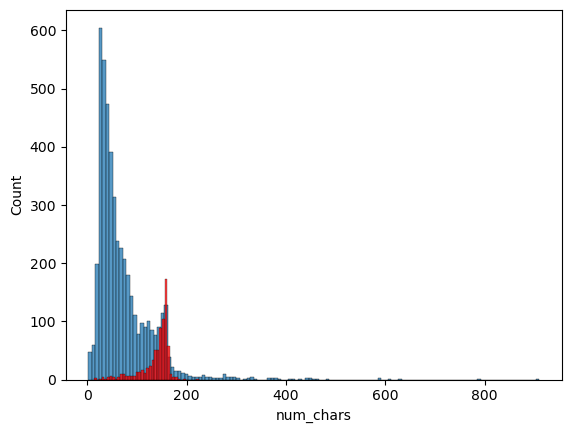

<Figure size 1200x600 with 0 Axes>

In [37]:
import seaborn as sns
sns.histplot(df[df["target"]==0]["num_chars"])
sns.histplot(df[df["target"]==1]["num_chars"], color="red")
plt.figure(figsize=(12,6))

<Axes: xlabel='num_words', ylabel='Count'>

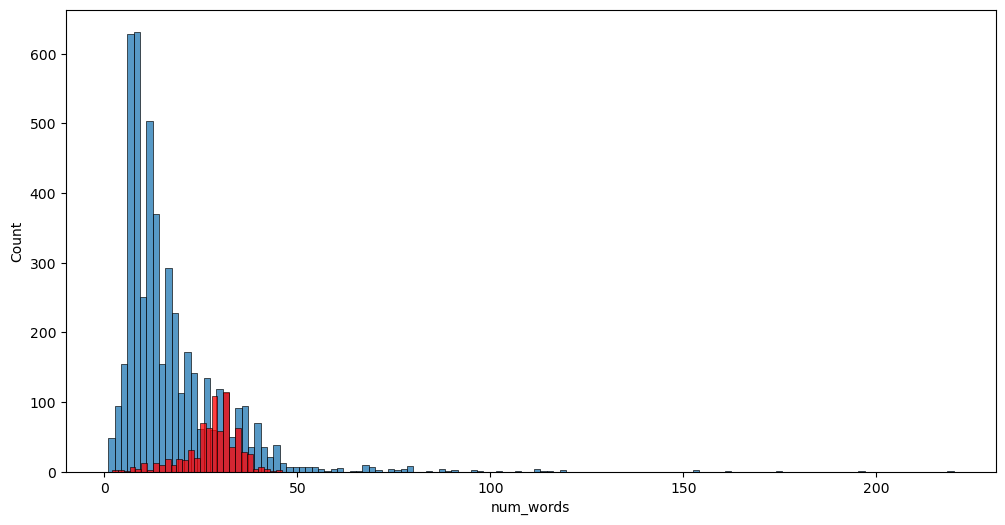

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df[df["target"]==0]["num_words"])
sns.histplot(df[df["target"]==1]["num_words"], color="red")

<Axes: xlabel='num_sentences', ylabel='Count'>

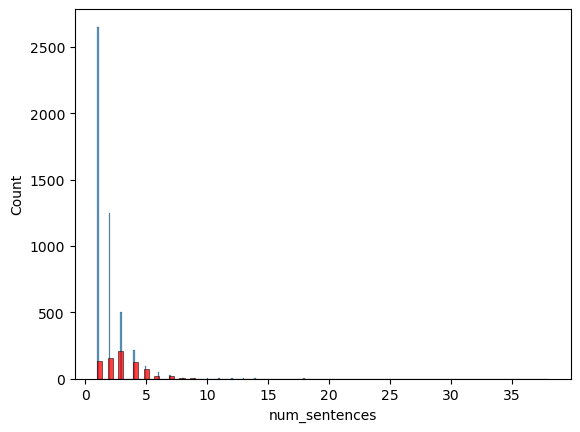

In [38]:
sns.histplot(df[df["target"]==0]["num_sentences"])
sns.histplot(df[df["target"]==1]["num_sentences"], color="red")

In [39]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\U$ER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [41]:
def transform_text(text):
    text=text.lower()
    text = word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    return text

In [42]:
transform_text("sHarmEen is , nice girl")

['sharmeen', 'is', 'nice', 'girl']

In [43]:
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
import string
def transform_text(text):
    text=text.lower()
    text = word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear() #emptying y in order to reuse it for removing stopwords
    for i in text:
        if i not in stopwords.words("english"): #and i not in string.punctuation:
            y.append(i)
    text =y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
      
    return " ".join(y)
            

In [45]:
transform_text("Sharmeen works is well")

'sharmeen work well'

In [46]:
transform_text('Do you prefer working with sharmeen and go')

'prefer work sharmeen go'

In [31]:
df["text"].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [53]:
df["transformed_text"]=df["text"].apply(transform_text)

In [58]:


from wordcloud import WordCloud
wc=WordCloud(width=500, height=500, min_font_size=10, background_color="white")


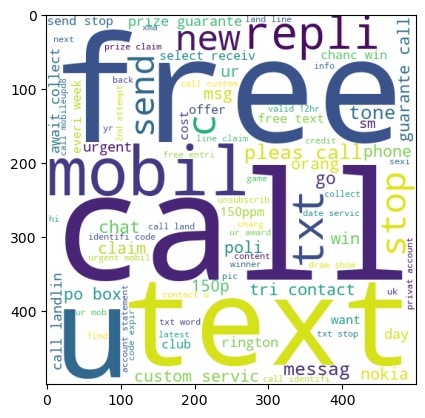

In [59]:
spam_wc=wc.generate(df[df["target"]==1]["transformed_text"].str.cat(sep=" "))
plt.imshow(spam_wc)

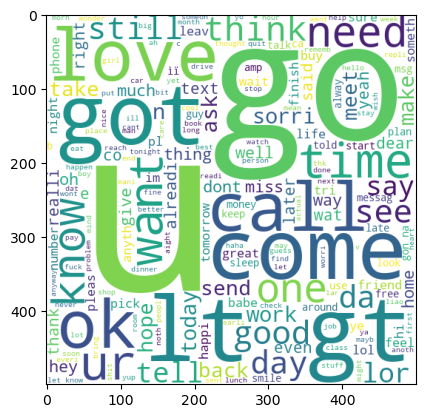

In [35]:
notspam_wc=wc.generate(df[df["target"]==0]["transformed_text"].str.cat(sep=" "))
plt.imshow(notspam_wc)

In [60]:
from collections import Counter
spam_corpus=[]
for msg in df[df["target"]==1]["transformed_text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)
spamcommon=pd.DataFrame(Counter(spam_corpus).most_common(30))      
spamcommon       

,0,1
0,call,365
1,free,219
2,2,174
3,txt,169
4,ur,144
5,u,141
6,text,139
7,mobil,135
8,4,120
9,claim,115


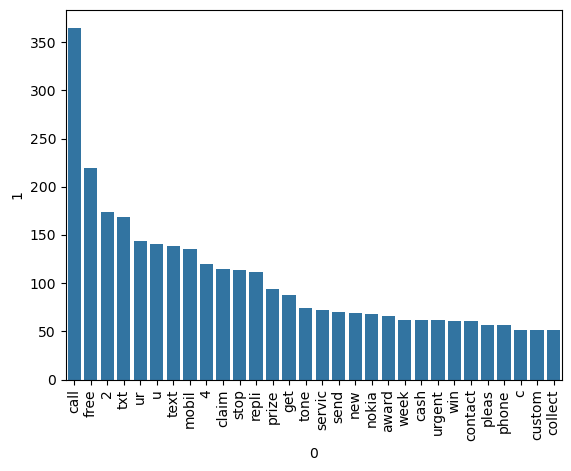

In [62]:
sns.barplot(x=spamcommon[0],y=spamcommon[1])
plt.xticks(rotation="vertical")
plt.show()

In [38]:

notspam_corpus=[]
for msg in df[df["target"]==0]["transformed_text"].tolist():
    for word in msg.split():
        spam_corpus.append(word)
notspamcommon=pd.DataFrame(Counter(spam_corpus).most_common(30))      
notspamcommon

,0,1
0,u,1002
1,call,553
2,2,439
3,go,436
4,get,423
5,ur,316
6,gt,288
7,lt,287
8,come,280
9,know,255


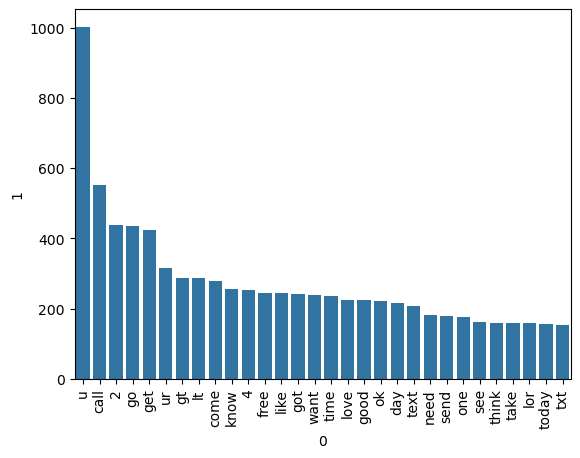

In [39]:
sns.barplot(x=notspamcommon[0],y=notspamcommon[1])
plt.xticks(rotation="vertical")
plt.show()



## Model selection and building

In [85]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer()
#tfidf=TfidfVectorizer(max_features=3000)
#we get better results if we hyperparametrize our model
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score

In [86]:
#x=cv.fit_transform(df["transformed_text"]).toarray()
#here i can also use tfidf to vectorize my text, it give better accuracy with MultinomialNb
x=tfidf.fit_transform(df["transformed_text"]).toarray()
y=df["target"]


In [42]:
#from sklearn.preprocessing import MinMaxScaler
#mms=MinMaxScaler()
#x=mms.fit_transform(x)

In [72]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [87]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [73]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8690582959641255
[[844 113]
 [ 33 125]]
0.5252100840336135


In [74]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.957847533632287
[[957   0]
 [ 47 111]]
1.0


In [88]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9695067264573991
[[956   1]
 [ 33 125]]
0.9920634920634921


In [91]:
text=input("Enter msg to be checked")
text=transform_text(text)
vectorized=tfidf.transform([text]).toarray()
bnb.predict(vectorized)

Enter msg to be checked Congratulations! You’ve been selected as a lucky winner! Claim your $500 gift card now by clicking this link


array([1], dtype=int64)

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [49]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(algorithm='SAMME',n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [50]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [51]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [52]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For  KN
Accuracy -  0.9003868471953579
Precision -  1.0
For  NB
Accuracy -  0.9593810444874274
Precision -  1.0
For  DT
Accuracy -  0.9361702127659575
Precision -  0.8461538461538461
For  LR
Accuracy -  0.9516441005802708
Precision -  0.94
For  RF
Accuracy -  0.971953578336557
Precision -  1.0
For  AdaBoost
Accuracy -  0.9245647969052224
Precision -  0.8409090909090909
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8625954198473282
For  ETC
Accuracy -  0.9729206963249516
Precision -  0.9824561403508771
For  GBDT
Accuracy -  0.9526112185686654
Precision -  0.9238095238095239
For  xgb
Accuracy -  0.9729206963249516
Precision -  0.9435483870967742


In [57]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [58]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

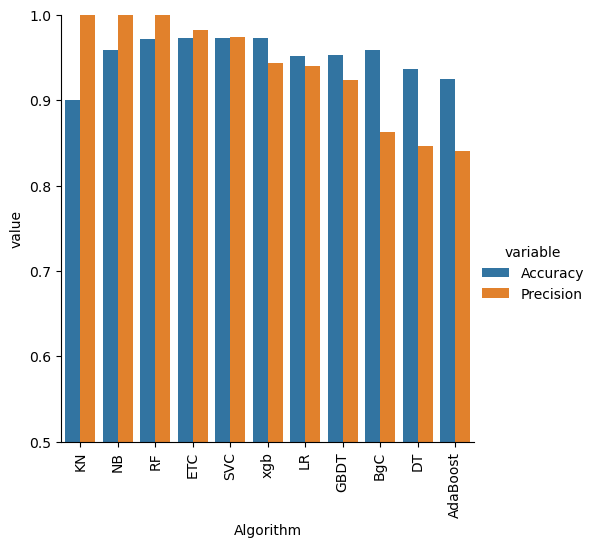

In [59]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [90]:
#stacking and voting classifier can be checked as well
import pickle
pickle.dump(tfidf,open("vectorizer.pkl", "wb"))
pickle.dump(mnb, open("model.pkl","wb"))
